In [8]:
# pip install imblearn

     -------------------------------------- 199.3/199.3 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 11.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

   id                       date  \
0   2  2022-09-09 03:04:00+00:00   
1   3  2022-09-09 02:15:19+00:00   
2   4  2022-09-08 23:45:04+00:00   
3   5  2022-09-08 19:12:20+00:00   
4   6  2022-09-08 17:48:43+00:00   

                                             content  Emotion  
0  posted reposted from may they rest peace and p...      5.0  
1  reporting today with for the death queen eliza...      3.0  
2  the choir practicing tonight for longplanned m...      3.0  
3         rip your royal majesty cry toronto ontario      7.0  
4  the flags are being lowered half mast after th...      0.0  
----------------------
Total Null values: 21
----------------------
----------------------------------------------
Total Null values after dropping null rows: 0
----------------------------------------------
Length of data set:  4041
Shape of data set:  (4041, 4)
Dataset information
-------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4041 entries, 0 to 4061
Data columns (total 4

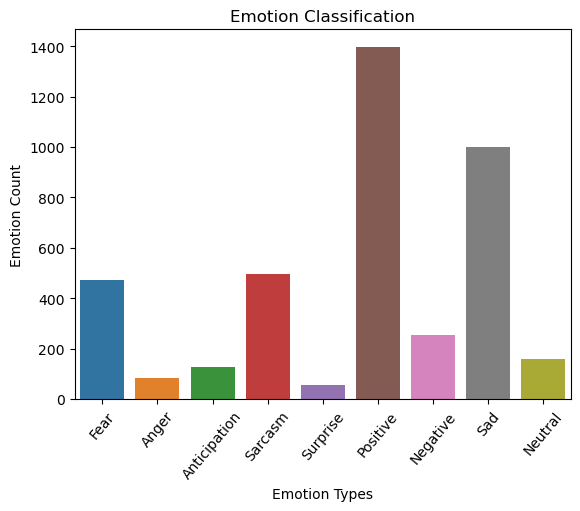

Shape of train data (3232,)
Shape of train data (809,)
No. of feature_words:  20000
No. of feature_words:  3000
Class=0, n=471 (11.656%)
Class=1, n=85 (2.103%)
Class=2, n=127 (3.143%)
Class=3, n=495 (12.249%)
Class=4, n=54 (1.336%)
Class=5, n=1397 (34.571%)
Class=6, n=252 (6.236%)
Class=7, n=1000 (24.746%)
Class=10, n=160 (3.959%)
--------------------
Before oversampling
--------------------
Counter({5.0: 1121, 7.0: 786, 3.0: 399, 0.0: 380, 6.0: 205, 10.0: 129, 2.0: 100, 1.0: 72, 4.0: 40})
--------------------
Class=0, n=380 (11.757%)
Class=1, n=72 (2.228%)
Class=2, n=100 (3.094%)
Class=3, n=399 (12.345%)
Class=4, n=40 (1.238%)
Class=5, n=1121 (34.684%)
Class=6, n=205 (6.343%)
Class=7, n=786 (24.319%)
Class=10, n=129 (3.991%)
--------------------------------
After SMOTE + ENN oversampling - TF-IDF vectorizer
--------------------------------
Class=0, n=943 (11.335%)
Class=1, n=1116 (13.415%)
Class=2, n=1121 (13.475%)
Class=3, n=953 (11.456%)
Class=4, n=1121 (13.475%)
Class=5, n=243 (2.9

In [7]:
# Get base path
base_path  = os.path.normpath(os.getcwd() + os.sep + os.pardir)

# Set file path
input_file_path = base_path + '\\Preprocessing\\'

%run "{input_file_path}smote_oversampling.ipynb"

In [ ]:
# Test train split

# X_train_tfidf_smote
# X_train_count_smote
# y_train_tfidf_smote
# y_train_count_smote
# X_test_count_vect
# X_test_tfidf_vect
# y_test

In [8]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

In [73]:
def bestC_for_MultinomialNB(X, y):
    mean_error=[]; std_error=[]
    c=[0.0001, 0.001,0.01,0.1]
    from sklearn.model_selection import KFold
    fold = KFold(n_splits=5, shuffle=True)
    for i in c:
        model = MultinomialNB(alpha=i)
        temp=[]
        kf = KFold(n_splits=5, shuffle = True)
        for train, test in fold.split(X):
            x_train, x_test = X[train], X[test]
            y_train, y_test = y[train], y[test]
            model.fit(x_train, y_train)
            ypred = model.predict(x_test)
            from sklearn.metrics import mean_squared_error
            temp.append(mean_squared_error(y_test,ypred))
        mean_error.append(np.array(temp).mean())
        std_error.append(np.array(temp).std())
    # print(len(mean_error))
    # print(len(std_error))
    plt.errorbar(c,mean_error,yerr=std_error, label = "Mean Error")
    #plt.errorbar(c,std_error,yerr=mean_error, label = "Standard deviation Error")
    plt.xlabel('C', fontweight ='bold'); plt.ylabel('Mean Square Error', fontweight ='bold')
    # xi = list(range(len(c)))
    # plt.xticks(xi, c)
    plt.title("Prediction Error vs C")
    # default_x_ticks = range(len(c))
    # plt.xticks(default_x_ticks, c)
    # plt.xlim((0,5))
    # plt.xlim((0.01, 1))
    plt.legend()
    plt.show()


4
4


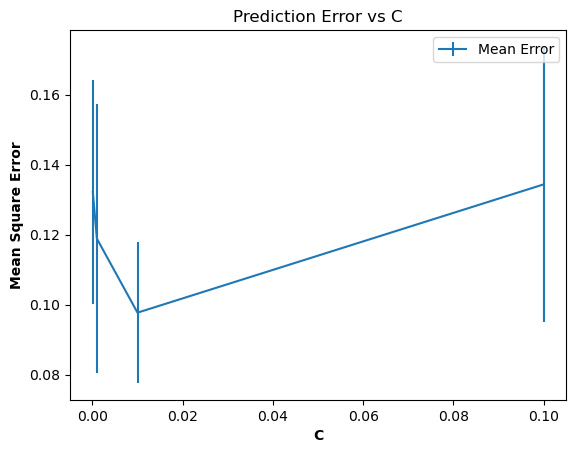

In [74]:
# Using k-Fold cross validation to find best C value for Multinomial Naive Bayes classification
bestC_for_MultinomialNB(X_train_tfidf_smote, y_train_tfidf_smote)

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_val_tfidf)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred, y_val))